In [48]:
import pandas as pd 
data = pd.read_csv("Data/eth.csv")
data.head()

,date,AdrActCnt,BlkCnt,BlkSizeByte,BlkSizeMeanByte,CapMrktCurUSD,DiffMean,FeeMeanNtv,FeeMeanUSD,FeeMedNtv,...,TxTfrValAdjUSD,TxTfrValMeanNtv,TxTfrValMeanUSD,TxTfrValMedNtv,TxTfrValMedUSD,TxTfrValNtv,TxTfrValUSD,VtyDayRet180d,VtyDayRet30d,VtyDayRet60d
0,2015-07-30,9206,6911,4449897,643.886124,NaN,1.213355e+11,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN
1,2015-07-31,424,6863,3994458,582.027976,NaN,6.029419e+11,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN
2,2015-08-01,413,5293,3044344,575.164179,NaN,8.872542e+11,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN
3,2015-08-02,432,5358,3112348,580.878686,NaN,1.020254e+12,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN
4,2015-08-03,444,5280,3099953,587.112311,NaN,1.125837e+12,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN


In [49]:
data.columns

Index(['date', 'AdrActCnt', 'BlkCnt', 'BlkSizeByte', 'BlkSizeMeanByte',
       'CapMrktCurUSD', 'DiffMean', 'FeeMeanNtv', 'FeeMeanUSD', 'FeeMedNtv',
       'FeeMedUSD', 'FeeTotNtv', 'FeeTotUSD', 'HashRate', 'IssContNtv',
       'IssContPctAnn', 'IssContUSD', 'IssTotNtv', 'IssTotUSD', 'NVTAdj',
       'NVTAdj90', 'PriceBTC', 'PriceUSD', 'ROI1yr', 'ROI30d', 'SplyCur',
       'TxCnt', 'TxTfrCnt', 'TxTfrValAdjNtv', 'TxTfrValAdjUSD',
       'TxTfrValMeanNtv', 'TxTfrValMeanUSD', 'TxTfrValMedNtv',
       'TxTfrValMedUSD', 'TxTfrValNtv', 'TxTfrValUSD', 'VtyDayRet180d',
       'VtyDayRet30d', 'VtyDayRet60d'],
      dtype='object')

/Users/karthikvenkatesh/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


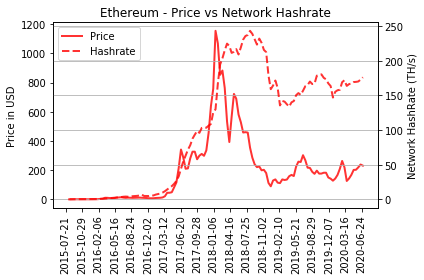

In [50]:
# create line plots to look at trends

eth_df = data[['date', 'PriceUSD', 'HashRate']]
eth_df['date'] =  pd.to_datetime(eth_df['date'])

eth_df = eth_df.resample('2W-Wed', label='right', closed = 'right', on='date').mean().reset_index().sort_values(by='date')

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.dates import DateFormatter
import matplotlib.ticker as ticker

fig, ax1 = plt.subplots()

line_weight = 2
alpha = 0.8
tick_spacing = 100

lns1 = ax1.plot(eth_df['date'], eth_df['PriceUSD'], color='r', lw=line_weight, alpha=alpha, label='Price')

plt.xticks(rotation=90)
ax2 = ax1.twinx()
lns2 = ax2.plot(eth_df['date'], eth_df['HashRate'],'--', color='r', lw=line_weight, alpha=alpha, label='Hashrate')
ax1.xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))
ax1.fmt_xdata = mdates.DateFormatter('%Y-%m-%d')

ax1.set_ylabel(r"Price in USD")
ax2.set_ylabel(r"Network HashRate (TH/s)")
leg = lns1 + lns2
labs = [l.get_label() for l in leg]
ax1.legend(leg, labs, bbox_to_anchor = (0,0,0.6,1))

plt.title("Ethereum - Price vs Network Hashrate")

fig.tight_layout()
plt.grid()
plt.show()


### Examine surge in price in April 2017

In [51]:
ap17_df = data[(data['date']>= '2017-03-01') & (data['date'] <= '2019-03-31')][['date','PriceUSD','HashRate']]
ap17_df

,date,PriceUSD,HashRate
580,2017-03-01,17.265684,10.524133
581,2017-03-02,19.204561,10.718212
582,2017-03-03,19.654703,11.139924
583,2017-03-04,18.684225,10.997418
584,2017-03-05,19.301111,11.524006
...,...,...,...
1336,2019-03-27,139.215307,131.649967
1337,2019-03-28,137.336612,130.955276
1338,2019-03-29,142.368977,132.055429
1339,2019-03-30,142.107745,126.643179


In [52]:
# create two week average of price and hashrate

df_2w = ap17_df[['date', 'HashRate', 'PriceUSD']]
df_2w['date'] =  pd.to_datetime(df_2w['date'])

df_2w = df_2w.resample('2W-Wed', label='right', closed = 'right', on='date').mean().reset_index().sort_values(by='date')
df_2w

,date,HashRate,PriceUSD
0,2017-03-01,10.524133,17.265684
1,2017-03-15,11.802343,21.823690
2,2017-03-29,14.399267,45.613837
3,2017-04-12,16.817178,45.965271
4,2017-04-26,19.168668,49.243545
5,2017-05-10,22.449514,81.954381
6,2017-05-24,26.605137,116.058002
7,2017-06-07,33.213746,214.783337
8,2017-06-21,44.093906,341.731538
9,2017-07-05,55.073661,286.549143


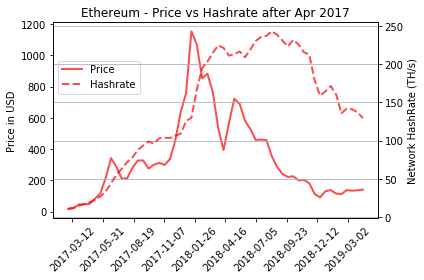

In [53]:
# make line plots for the trends

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.dates import DateFormatter
import matplotlib.ticker as ticker

fig, ax1 = plt.subplots()

line_weight = 2
alpha = 0.7
tick_spacing = 80

lns1 = ax1.plot(df_2w['date'], df_2w['PriceUSD'], color='r', lw=line_weight, alpha=alpha, label='Price')

plt.xticks(rotation=45)
ax2 = ax1.twinx()
lns2 = ax2.plot(df_2w['date'], df_2w['HashRate'],'--', color='r', lw=line_weight, alpha=alpha, label='Hashrate')
ax1.xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))
ax1.fmt_xdata = mdates.DateFormatter('%Y-%m-%d')

ax1.set_ylabel(r"Price in USD")
ax2.set_ylabel(r"Network HashRate (TH/s)")
leg = lns1 + lns2
labs = [l.get_label() for l in leg]
ax1.legend(leg, labs, bbox_to_anchor = (0,0,0.6,0.83))

plt.title("Ethereum - Price vs Hashrate after Apr 2017")

fig.tight_layout()
plt.grid()
plt.show()

In [54]:
# define growth rate for price and hashrate for two week periods
tmp = df_2w

for i in range(1, tmp.shape[0]):
    tmp.loc[tmp.index[i], '%change_price'] = ((tmp['PriceUSD'].iloc[i] - tmp['PriceUSD'].iloc[i-1])/(tmp['PriceUSD'].iloc[i-1]))*100
    tmp.loc[tmp.index[i], '%change_hashrate'] = ((tmp['HashRate'].iloc[i] - tmp['HashRate'].iloc[i-1])/(tmp['HashRate'].iloc[i-1]))*100
tmp

,date,HashRate,PriceUSD,%change_price,%change_hashrate
0,2017-03-01,10.524133,17.265684,NaN,NaN
1,2017-03-15,11.802343,21.823690,26.399217,12.145516
2,2017-03-29,14.399267,45.613837,109.010654,22.003455
3,2017-04-12,16.817178,45.965271,0.770454,16.791904
4,2017-04-26,19.168668,49.243545,7.132068,13.982671
5,2017-05-10,22.449514,81.954381,66.426647,17.115669
6,2017-05-24,26.605137,116.058002,41.612932,18.510971
7,2017-06-07,33.213746,214.783337,85.065513,24.839599
8,2017-06-21,44.093906,341.731538,59.105237,32.758002
9,2017-07-05,55.073661,286.549143,-16.147879,24.900843


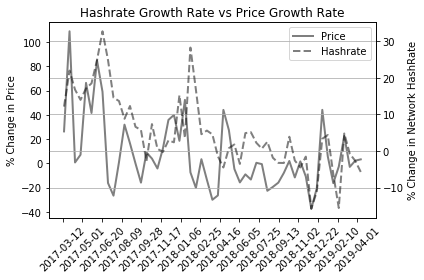

In [55]:
# plot growth rates for both

fig, ax1 = plt.subplots()

line_weight = 2
alpha = 0.5
tick_spacing = 50

lns1 = ax1.plot(tmp['date'], tmp['%change_price'], color='black', lw=line_weight, alpha=alpha, label='Price')

plt.xticks(rotation=45)
ax2 = ax1.twinx()
lns2 = ax2.plot(tmp['date'], tmp['%change_hashrate'],'--', color='black', lw=line_weight, alpha=alpha, label='Hashrate')
ax1.xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))
ax1.fmt_xdata = mdates.DateFormatter('%Y-%m-%d')

ax1.set_ylabel(r"% Change in Price")
ax2.set_ylabel(r"% Change in Network HashRate")
#ax1.set_ylim(-40,80)
#ax2.set_ylim(-40,80)
leg = lns1 + lns2
labs = [l.get_label() for l in leg]
ax1.legend(leg, labs, bbox_to_anchor = (0,0,1,1))

plt.title("Hashrate Growth Rate vs Price Growth Rate")

fig.tight_layout()
plt.grid()
plt.show()

In [56]:
# Compute (Hashrate change - price change)
# if this value is +ve, hashrate is growing faster than rate of price growth. if it's negative, price change is greater

tmp2 = tmp
for i in range(1, tmp2.shape[0]):
    tmp2.loc[tmp2.index[i], 'hashgrowth-pricegrowth'] = (tmp2['%change_hashrate'].iloc[i] - tmp['%change_price'].iloc[i])
tmp2

,date,HashRate,PriceUSD,%change_price,%change_hashrate,hashgrowth-pricegrowth
0,2017-03-01,10.524133,17.265684,NaN,NaN,NaN
1,2017-03-15,11.802343,21.823690,26.399217,12.145516,-14.253702
2,2017-03-29,14.399267,45.613837,109.010654,22.003455,-87.007199
3,2017-04-12,16.817178,45.965271,0.770454,16.791904,16.021450
4,2017-04-26,19.168668,49.243545,7.132068,13.982671,6.850603
5,2017-05-10,22.449514,81.954381,66.426647,17.115669,-49.310978
6,2017-05-24,26.605137,116.058002,41.612932,18.510971,-23.101961
7,2017-06-07,33.213746,214.783337,85.065513,24.839599,-60.225914
8,2017-06-21,44.093906,341.731538,59.105237,32.758002,-26.347235
9,2017-07-05,55.073661,286.549143,-16.147879,24.900843,41.048722


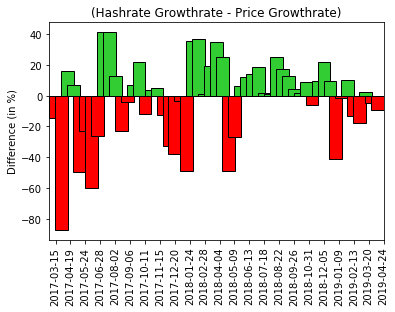

In [57]:
import matplotlib.dates as mdates

fig, ax = plt.subplots()

colors = []
diff_list = tmp2['hashgrowth-pricegrowth'].tolist()

diff_dict = {}
num = list(range(0,len(diff_list)))

alpha = 1

for i in num:
    diff_dict[i] = diff_list[i]

for value in diff_dict.keys():
    if diff_dict[value] < 0:
        colors.append('r')
    else:
        colors.append('limegreen')

ax.bar(tmp2['date'], tmp2['hashgrowth-pricegrowth'], width=30, edgecolor='black', color=colors, alpha=alpha)
ax.xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m-%d"))
ax.xaxis.set_major_locator(mdates.DayLocator(interval=35))
ax.autoscale(enable=True, axis='x', tight=True)
#ax.set_facecolor('beige')
plt.xticks(rotation=90)

plt.title('(Hashrate Growthrate - Price Growthrate)')
plt.ylabel('Difference (in %)')
plt.show()